In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

**Задания 1, 2**  
Загрузите файл HR.csv в pandas dataframe.  
Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).  

In [3]:
# Загружаем файл HR.csv в dataframe pandas
hr = pd.read_csv('hr.csv')
hr.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [3]:
# Основные статистики для переменных (в т.ч. среднее, медиана, мин/макс, сред. отклонение)
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
# Моды для переменных
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


**Задание 3**  
Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [5]:
# Корреляционная матрица
hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [6]:
# Определим наименее скореллированные переменные
hr.corr().abs().min().sort_values()

time_spend_company       0.002120
Work_accident            0.002120
average_montly_hours     0.003544
promotion_last_5years    0.003544
number_project           0.004741
last_evaluation          0.006567
left                     0.006567
satisfaction_level       0.020048
dtype: float64

In [7]:
# Определим наиболее скореллированные переменные
hr.corr().abs().unstack().sort_values(ascending=False).head(12)

promotion_last_5years  promotion_last_5years    1.000000
left                   left                     1.000000
last_evaluation        last_evaluation          1.000000
number_project         number_project           1.000000
average_montly_hours   average_montly_hours     1.000000
time_spend_company     time_spend_company       1.000000
Work_accident          Work_accident            1.000000
satisfaction_level     satisfaction_level       1.000000
average_montly_hours   number_project           0.417211
number_project         average_montly_hours     0.417211
satisfaction_level     left                     0.388375
left                   satisfaction_level       0.388375
dtype: float64

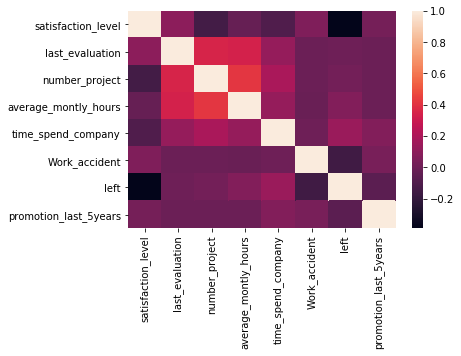

In [8]:
# Визуализация корреляционной матрицы
sns.heatmap(hr.corr())

**Вывод по корреляциям**  
* две самые скоррелированные переменные - кол-во отработанных часов и кол-во выполненных проектов (коэф. 0.417)
* две наименее скоррелированные переменные  - кол-во инцидентов и стаж работы (коэф. 0.002)

**Задания 4, 5, 6**  
Рассчитайте сколько сотрудников работает в каждом департаменте.  
Показать распределение сотрудников по зарплатам.  
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.  

In [9]:
# Рассчитаем сколько сотрудников работает в каждом департаменте
hr.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

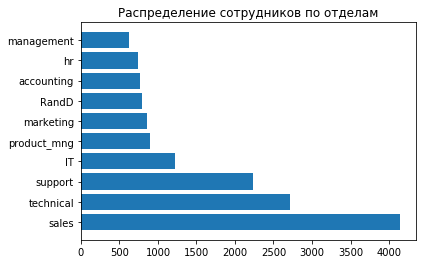

In [72]:
units = hr.department.value_counts()
plt.barh(units.index.values, units)
plt.title('Распределение сотрудников по отделам')
plt.show()

**Вывод**  
Распределение сотрудников по отделам выглядит типичной пирамидой, где наверху менеджмент вместе HR и финансами, посередине Marketing & Products вместе с ИТ и разработчиками, внизу технический персонал, сотрудники службы поддержки и довольно большое кол-во менеджеров по продажам.

In [4]:
# Распределение сотрудников по зарплатам
hr.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

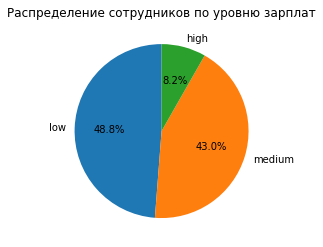

In [69]:
salaries = hr.salary.value_counts()
plt.pie(salaries, labels=salaries.index.values, autopct='%1.1f%%', startangle=90)
plt.title('Распределение сотрудников по уровню зарплат')
plt.show()

**Вывод**  
В целом зарплаты делятся на примерно равные части между низким и средним уровнем, плюс есть достаточно узкая прослойка реально хорошо зарабатывающих сотрудников.

In [119]:
# Распределение сотрудников по зарплатам в каждом департаменте по отдельности
salaries_units = hr.pivot_table(index='department', columns='salary', values='number_project', aggfunc='count', margins=True)
salaries_units = salaries_units[['high', 'medium', 'low', 'All']]
salaries_units

salary,high,medium,low,All
department,,,,
IT,83,535,609,1227
RandD,51,372,364,787
accounting,74,335,358,767
hr,45,359,335,739
management,225,225,180,630
marketing,80,376,402,858
product_mng,68,383,451,902
sales,269,1772,2099,4140
support,141,942,1146,2229


In [128]:
# Для большей наглядности посчитаем проценты по распределению зарплат внутри каждого отдела
salaries_units_percent = salaries_units.div(salaries_units['All'], axis = 'index').mul(100)
del salaries_units_percent['All']
salaries_units_percent

salary,high,medium,low
department,,,
IT,6.764466,43.602282,49.633252
RandD,6.480305,47.268107,46.251588
accounting,9.647979,43.676662,46.675359
hr,6.089310,48.579161,45.331529
management,35.714286,35.714286,28.571429
marketing,9.324009,43.822844,46.853147
product_mng,7.538803,42.461197,50.000000
sales,6.497585,42.801932,50.700483
support,6.325707,42.261104,51.413190


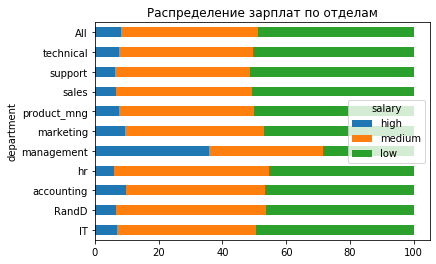

In [124]:
salaries_units_percent.plot(kind='barh', stacked=True, title="Распределение зарплат по отделам")

**Вывод**  
У большинства отделов распределение зарплат примерно соответствует среднему по всей организации.  
Явное исключение - представители менеджмента, где процент высоких зарплат выше среднего в несколько раз.

**Задание 7**  
Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.  

H0: Сотрудники с высоким окладом проводят на работе примерно столько же времени, сколько сотрудники с низким окладом  
H1: Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом  
Уровень значимости 0.05

In [12]:
alfa = 0.05
hours_high_salary = hr[hr.salary == 'high'].average_montly_hours
hours_low_salary = hr[hr.salary == 'low'].average_montly_hours

In [13]:
result = stats.ttest_ind(hours_high_salary, hours_low_salary, equal_var=False)
print(result)
if result.pvalue < alfa:
    print("Отвергаем нулевую гипотезу")
    if result.statistic > 0:
        print("Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом")
    else:
        print("Сотрудники с высоким окладом проводят на работе меньше времени, чем сотрудники с низким окладом")
else:
    print("Не отвергаем нулевую гипотезу; сотрудники с высоким окладом проводят на работе примерно столько же времени, сколько сотрудники с низким окладом")

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу; сотрудники с высоким окладом проводят на работе примерно столько же времени, сколько сотрудники с низким окладом


**Задание 8**  
Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):  
● Доля сотрудников с повышением за последние 5 лет  
● Средняя степень удовлетворенности  
● Среднее количество проектов  

In [14]:
# Сначала рассчитаем 2 показателя:
# Средняя степень удовлетворенности (satisfaction_level)
# Среднее количество проектов (number_project)
hr.pivot_table(index='left', values=['satisfaction_level', 'number_project'], aggfunc='mean')

,number_project,satisfaction_level
left,,
0,3.786664,0.666810
1,3.855503,0.440098


In [127]:
# Рассчитаем долю сотрудников с повышением за последние 5 лет среди уволившихся и неуволившихся сотрудников (по отдельности): 
# Значения в соотв. колонке бинарные 0 и 1, поэтому среднее значение показывает долю единиц, т.е. долю с повышением
temp = hr.pivot_table(index='left', values=['promotion_last_5years'], aggfunc='mean')
print(f"Доля сотрудников с повышением за последние 5 лет среди уволившихся: {temp.iloc[1, 0]:.1%}")
print(f"Доля сотрудников с повышением за последние 5 лет среди неуволившихся: {temp.iloc[0, 0]:.1%}")

Доля сотрудников с повышением за последние 5 лет среди уволившихся: 0.5%
Доля сотрудников с повышением за последние 5 лет среди неуволившихся: 2.6%


**Вывод**  
При сравнении уволившихся и неуволившихся сотрудников по отдельности видно, что по количеству выполненных проектов уволившиеся как минимум не уступают оставшимся (в среднем). При этом кол-во повышений среди них меньше в 5 раз, а их уровень удовлетворенности работой был заметно ниже. Неудивительно, что такие сотрудники в конце концов увольнялись из организации.

**Задание 9**  
Разделить данные на тестовую и обучающую выборки.  
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).  
Оценить качество модели на тестовой выборке.  

In [16]:
# Убираем колонки department и salary
del hr['department']
del hr['salary']

In [17]:
# Делим данные на тестовую и обучающую выборки. Соотношение 20/80.
from sklearn.model_selection import train_test_split
hr_train, hr_test = train_test_split(hr, test_size=0.2)

In [18]:
# Выносим целевую переменную в отдельные выборки
y_train = hr_train['left']
y_test = hr_test['left']
del hr_train['left']
del hr_test['left']

In [19]:
# Строим модель LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(hr_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [20]:
# Оценим результат предсказания
result = pd.DataFrame([y_test.values, lda.predict(hr_test)]).T
print(f"Точность предсказания: {len(result[result[0] == result[1]])/len(result):.1%}")

Точность предсказания: 77.1%


In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values, lda.predict(hr_test))
print(f"Confusion_matrix: \n{cm}")
print(f"Количество ложноположительных предсказаний: {cm[0][1]/len(result):.1%}")
print(f"Количество ложноотрицательных предсказаний: {cm[1][0]/len(result):.1%}")

Confusion_matrix: 
[[2121  173]
 [ 513  193]]
Количество ложноположительных предсказаний: 5.8%
Количество ложноотрицательных предсказаний: 17.1%


**Вывод**  
Качество предсказания нельзя признать высоким. Даже введение в модель цифр по зарплате (сделав некоторые разумные предположения) повышает точность предсказания лишь на 2-3%.  
Видно, что статистика по ошибочным предсказаниям смещена в сторону ложноотрицательных результатов, что не удивительно, так как сотрудники могут увольняться по множеству самых разных причин, в том числе и личных.  